In [28]:
#This cell block is used to import all the proper libraries and modules needed for the functions in code

import random
import numpy as np
from numpy.polynomial.polynomial import polyfit
import matplotlib
import matplotlib.pyplot as plt
import csv
import math
import glob
import errno
import time
import os
import sys

import astropy.io.fits as pyfits


from astropy.io import ascii

26.27862320874889 21.110571570611206


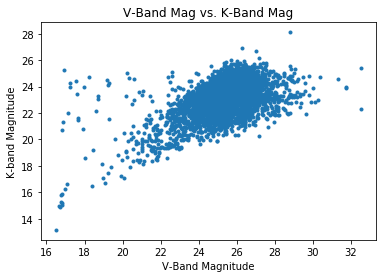

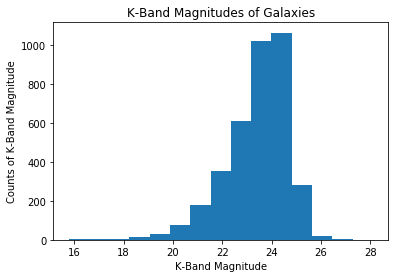

In [29]:
#Declaring arrays and opening catalog with a csv reader along with a 'with' function
fluxv = []
fluxk = []

histflux = []
galnum = []


goodval = []


with open('/home/jacob/PHOTOMETRY/PHOTOM_CATS/SpARCS-0035_totalall_HAWKIKs.cat', 'r') as magfile:
    magplots = csv.reader(magfile)
    firstmagline = magfile.readline()
    #Reads in each line of code and assigns it a variable name. This is condensed later with the use of
    #ascii.read() but for at the time, csv reading was used.
    for line in magfile:
        id , ra , dec , x , y , hawkiks_tot , k_flag , k_star , k_fluxrad , totmask , hawkiks , ehawkiks , vimosu , evimosu , vimosb , \
        evimosb , vimosv , evimosv , vimosr , evimosr , vimosi , evimosi , decamz , edecamz , fourstarj1 , efourstarj1 , hawkij , ehawkij , \
        irac1 , eirac1 , irac2, eirac2 , irac3 , eirac3 , irac4 , eirac4 = line.split()
        #Loops through the values of the v and k bands and finds if the flux ratio is less than 0
        #found out later that a negative flux means that the source is so faint compared to the background
        #that when the background is subtracted, the source comes out as 'negative'
        try:
            testx = float(vimosv)
            testy = float(hawkiks)
        except ValueError:
            print(vimosv, hawkiks)
        if testx < 0.0:
            continue
        if testy < 0.0:
            continue
        #With the proper fluxes found for the bands, this function finds the magnitude of the flux centered
        #centered around 25
        try:
            magfluxv = -2.5 * math.log10(testx) + 25
            magfluxk = -2.5 * math.log10(testy) + 25
        except ValueError:
            print(magfluxv, magfluxk)
        #appends the magnitude of the flux of each band to the before mentioned array
        fluxv.append(magfluxv)
        fluxk.append(magfluxk)
        
        #assigns values of when the 'flag' value within the catalog is 'good'
        goodflag = float(k_flag)
        goodhawki = float(hawkiks)
        #values of 0 were considered good, so if those flags were good then we could determine if the source
        #was bright enough to do accurate calculations on
        if goodflag != 0.0:
            continue
        try:
            histfluxk = -2.5 * math.log10(goodhawki) + 25
        except ValueError:
            print(histfluxk)
        #appends the id numbers and the k band flux magnitude for that galaxy within the catalog
        histflux.append(histfluxk)
        galnum.append(float(id))
        #with the flags being good, and the k band magnitude being bright enough, we could append the good
        #band values from the catalog for data manipulation
        goodphoto = float(k_flag)
        goodktot = float(hawkiks_tot)
        goodk = float(hawkiks)
        goodu = float(vimosu)
        goodv = float(vimosv)
        goodb = float(vimosb)
        goodr = float(vimosr)
        goodi = float(vimosi)
        goodj = float(hawkij)
        #lambda values for each band
        lamk = 2.2*10**4
        lamu = 3.65*10**3
        lamv = 5.51*10**3
        lamb = 4.45*10**3
        lamr = 6.58*10**3
        lami = 8.06*10**3
        lamj = 1.22*10**4

        #basically the same set up but to build a plot using 'good' values using if statements to cycle through
        #the 'bad' values
        if goodphoto != 0.0:
            continue
        try:
            ranhawk = -2.5*math.log10(goodktot) + 25
        except ValueError:
            print(ranhawk)
        if ranhawk > 23.0:
            continue
        if goodk < 0.0:
            continue
        if goodu < 0.0:
            continue
        if goodv < 0.0:
            continue
        if goodb < 0.0:
            continue
        if goodr < 0.0:
            continue
        if goodi < 0.0:
            continue
        if goodj < 0.0:
            continue
        #filling in arrays with their values to build plots
        lamval = [lamu, lamb, lamv, lamr, lami, lamj, lamk]
        goodval = [goodu, goodb, goodv, goodr, goodi, goodj, goodk]
#plots a v band vs k band magnitude graph
plt.plot(fluxv, fluxk, '.')
plt.xlabel('V-Band Magnitude')
plt.ylabel('K-band Magnitude')
plt.title('V-Band Mag vs. K-Band Mag')
plt.show()
#builds a histogram of the number of galaxies that fill each bin. For higher resolution, smaller bin sizes
#can be used.
n, bins, patches = plt.hist(histflux, bins = 15)
plt.xlabel('K-Band Magnitude')
plt.ylabel('Counts of K-Band Magnitude')
plt.title('K-Band Magnitudes of Galaxies')
plt.show()

In [30]:
#building arrays for later values
xval = []
yval = []

fluxu = []
fluxb = []
fluxv = []
fluxr = []
fluxi = []
fluxz = []
fluxy = []
fluxj = []
fluxk = []
fluxi1 = []
fluxi2 = []
#fluxi3 = []
#fluxi4 = []

#error value arrays for later
erru = []
errb = []
errv = []
errr = []
erri = []
errz = []
erry = []
errj = []
errk = []

#galaxy id "index" array to tell which galaxy we are looking at along with its rest wavelength
galindex = []
xprime = []
#galaxies lambda values for each band
gallamb = []

#opens up a catalog of the transmission curves for all the filters.
#filterfile = ("/Users/grudnick/Work/GOGREEN/Data/Releases/v1.1/PHOTOMETRY/FILTERS/FILTER.RES.GOGREEN")
filterfile = ("/home/jacob/Documents/Research/FILTER.RES.GOGREEN")
f = open(filterfile, 'r')

# make dictionary to hold all filter curves
filtercurves = {}

#opens up catalog along with z_spec catalog
#path = "/Users/grudnick/Work/GOGREEN/Data/Releases/v1.1/PHOTOMETRY"
path = "/home/jacob/PHOTOMETRY"
zfile = path + "/SPECZ_MATCHED/compilation_SpARCS-0035.dat"
zdat = ascii.read(zfile)

photfile = path + "/PHOTOM_CATS/SpARCS-0035_totalall_HAWKIKs.cat"
photdat = ascii.read(photfile)


In [31]:
#strips the lines so that each column has a distinction of variables
for line in f:
    # print(repr(line))
    line = line.strip()
    cols = line.split()
    # print(cols)

# find number of lines for next filter curve
    nlines = int(cols[0])  # converts string to integer
    filtname = cols[1]  # name of that filter
# initialize array for lambda and transmission
    lam = np.array([])
    trans = np.array([])
    for iline in range(nlines):
    # reads in a single line
        transline = f.readline()
        transline = transline.strip()
        transcols = transline.split()
        lam = np.append(lam, float(transcols[1]))
        trans = np.append(trans, float(transcols[2]))
    filtercurves[filtname] = {'lam': lam, 'trans': trans}

#print(filtercurves['g'])
#print('wavelength of filter curve = ', filtercurves['g']['lam'])

#finds the wavelength for each filter using a trapz function to find the peak wavelength.
top = (np.trapz(filtercurves['VIMOSU']['trans'] * filtercurves['VIMOSU']['lam'], x = filtercurves['VIMOSU']['lam']))
bot = (np.trapz(filtercurves['VIMOSU']['trans'], x = filtercurves['VIMOSU']['lam']))
Uwave = top / bot
#print(Uwave, "wavelength of U filter")

top = (np.trapz(filtercurves['VIMOSB']['trans'] * filtercurves['VIMOSB']['lam'], x = filtercurves['VIMOSB']['lam']))
bot = (np.trapz(filtercurves['VIMOSB']['trans'], x = filtercurves['VIMOSB']['lam']))
Bwave = top / bot
#print(Bwave, "wavelength of B filter")

top = (np.trapz(filtercurves['VIMOSV']['trans'] * filtercurves['VIMOSV']['lam'], x = filtercurves['VIMOSV']['lam']))
bot = (np.trapz(filtercurves['VIMOSV']['trans'], x = filtercurves['VIMOSV']['lam']))
Vwave = top / bot
#print(Vwave, "wavelength of V filter")

top = (np.trapz(filtercurves['VIMOSR']['trans'] * filtercurves['VIMOSR']['lam'], x = filtercurves['VIMOSR']['lam']))
bot = (np.trapz(filtercurves['VIMOSR']['trans'], x = filtercurves['VIMOSR']['lam']))
Rwave = top / bot
#print(Rwave, "wavelength of R filter")

top = (np.trapz(filtercurves['VIMOSI']['trans'] * filtercurves['VIMOSI']['lam'], x = filtercurves['VIMOSI']['lam']))
bot = (np.trapz(filtercurves['VIMOSI']['trans'], x = filtercurves['VIMOSI']['lam']))
Iwave = top / bot
#print(Iwave, "Wavelength of I filter")

top = (np.trapz(filtercurves['DECamz']['trans'] * filtercurves['DECamz']['lam'], x = filtercurves['DECamz']['lam']))
bot = (np.trapz(filtercurves['DECamz']['trans'], x = filtercurves['DECamz']['lam']))
Zwave = top / bot
#print(Zwave, "wavelength of Z filter")

top = (np.trapz(filtercurves['FOURSTARJ1']['trans'] * filtercurves['FOURSTARJ1']['lam'], x = filtercurves['FOURSTARJ1']['lam']))
bot = (np.trapz(filtercurves['FOURSTARJ1']['trans'], x = filtercurves['FOURSTARJ1']['lam']))
Ywave = top / bot
#print(Ywave, "wavelength of Y")

top = (np.trapz(filtercurves['HAWKIJ']['trans'] * filtercurves['HAWKIJ']['lam'], x = filtercurves['HAWKIJ']['lam']))
bot = (np.trapz(filtercurves['HAWKIJ']['trans'], x = filtercurves['HAWKIJ']['lam']))
Jwave = top / bot
#print(Jwave, "wavelength of J")

top = (np.trapz(filtercurves['HAWKIKs']['trans'] * filtercurves['HAWKIKs']['lam'], x = filtercurves['HAWKIKs']['lam']))
bot = (np.trapz(filtercurves['HAWKIKs']['trans'], x = filtercurves['HAWKIKs']['lam']))
Kwave = top / bot
#print(Kwave, "wavelength of K")

top = (np.trapz(filtercurves['IRAC1']['trans'] * filtercurves['IRAC1']['lam'], x = filtercurves['IRAC1']['lam']))
bot = (np.trapz(filtercurves['IRAC1']['trans'], x = filtercurves['IRAC1']['lam']))
I1wave = top / bot
print(I1wave, "wavelength of IRAC1")

top = (np.trapz(filtercurves['IRAC2']['trans'] * filtercurves['IRAC2']['lam'], x = filtercurves['IRAC2']['lam']))
bot = (np.trapz(filtercurves['IRAC2']['trans'], x = filtercurves['IRAC2']['lam']))
I2wave = top / bot
print(I2wave, "wavelength of IRAC2")

#not needed, but does the same thing for the IRAC3/4 bands
#top = (np.trapz(filtercurves['IRAC3']['trans'] * filtercurves['IRAC3']['lam'], x = filtercurves['IRAC3']['lam']))
#bot = (np.trapz(filtercurves['IRAC3']['trans'], x = filtercurves['IRAC3']['lam']))
#I3wave = top / bot
#print(I3wave, "wavelength of IRAC3")

#top = (np.trapz(filtercurves['IRAC4']['trans'] * filtercurves['IRAC4']['lam'], x = filtercurves['IRAC4']['lam']))
#bot = (np.trapz(filtercurves['IRAC4']['trans'], x = filtercurves['IRAC4']['lam']))
#I4wave = top / bot
#print(I4wave, "wavelength of IRAC4")

#appends the wavelength values from the trapz functions to the 'x' coordinate array
xval.append(Uwave)
xval.append(Bwave)
xval.append(Vwave)
xval.append(Rwave)
xval.append(Iwave)
xval.append(Zwave)
xval.append(Ywave)
xval.append(Jwave)
xval.append(Kwave)
#xval.append(I1wave)
#xval.append(I2wave)
#xval.append(I3wave)
#xval.append(I4wave)
print(xval)

35634.260329464596 wavelength of IRAC1
45110.187071778135 wavelength of IRAC2
[3749.196280143219, 4326.662575425886, 5478.756947115411, 6485.848858220533, 8215.965645253278, 9179.498493719297, 10551.440926936704, 12583.924128678638, 21485.081904803104]


In [32]:
#This cell determines the frequencies of each wavelength to change the flux ratio to a wavelength value
freq = []
#freq = [(3 * 10**18) / xval]
#for lam in range(11):
    #freq.append((3 * 10**18) / xval[lam])
#print(freq)
for lam in range(9):
    freq.append((3 * 10**18) / xval[lam])

In [33]:
totmag = np.vectorize(photdat['HAWKIKs_tot'])

goodmag = -2.5 * np.log10(photdat['HAWKIKs_tot']) + 25

# a better way is to use the numpy.where() command
# this is an array of all indices which satisfy the condition in the ()
izspec = np.where((zdat['quality'] > 0) & (photdat['totmask'] == 0) & (photdat['K_flag'] == 0) & (goodmag < 23))
#izspec = np.where(np.any(zdat['quality'] == 3 or zdat['quality'] == 4) & (photdat['totmask'] == 0) & (photdat['K_flag'] == 0) & (goodmag < 23))
#print(izspec)

# this prints the rows of the two tables that correspond to these indices
#print(photdat['id'][izspec], zdat['PHOTCATID'][izspec], zdat['spec_z'][izspec])

# an equally good way is to make an array of booleans
# this makes an array of the same size as your table, but with a list of "True" and "False" depending on whether or not you satisfy the condition
#goodvals = ((zdat['spec_z'] > 0) & (photdat['totmask'] == 0))
#print(goodvals)

# this prints the rows of the two tables that have the Boolean value==True
#print(photdat['id'][goodvals], zdat['PHOTCATID'][goodvals], zdat['spec_z'][goodvals])

#assigns a 'seed' for the random galaxies so that the galaxies selected ARE random, but when running functions
#and plots, the galaxies selected stay the same
random.seed(24)
sample_list = random.sample(list(photdat['id'][izspec]), k=5)
print(sample_list)

[4531, 2592, 3594, 1943, 2036]


In [34]:
#for loop to append the proper values for each galaxy
for rangal in sample_list:
    print('rangal: ', rangal)
    print('id: ', list(photdat['id']).index(rangal))
    index = list(photdat['id']).index(rangal)
    galindex.append(photdat['id'][index])
    fluxu.append(photdat['VIMOSU'][index])
    fluxb.append(photdat['VIMOSB'][index])
    fluxv.append(photdat['VIMOSV'][index])
    fluxr.append(photdat['VIMOSR'][index])
    fluxi.append(photdat['VIMOSI'][index])
    fluxz.append(photdat['DECamz'][index])
    fluxy.append(photdat['FOURSTARJ1'][index])
    fluxj.append(photdat['HAWKIJ'][index])
    fluxk.append(photdat['HAWKIKs'][index])
    
    erru.append(photdat['eVIMOSU'][index])
    errb.append(photdat['eVIMOSB'][index])
    errv.append(photdat['eVIMOSV'][index])
    errr.append(photdat['eVIMOSR'][index])
    erri.append(photdat['eVIMOSI'][index])
    errz.append(photdat['eDECamz'][index])
    erry.append(photdat['eFOURSTARJ1'][index])
    errj.append(photdat['eHAWKIJ'][index])
    errk.append(photdat['eHAWKIKs'][index])
    #fluxi1.append(photdat['IRAC1'][index])
    #fluxi2.append(photdat['IRAC2'][index])
    #fluxi3.append(photdat['IRAC3'][index])
    #fluxi4.append(photdat['IRAC4'][index])

rangal:  4531
id:  4530
rangal:  2592
id:  2591
rangal:  3594
id:  3593
rangal:  1943
id:  1942
rangal:  2036
id:  2035


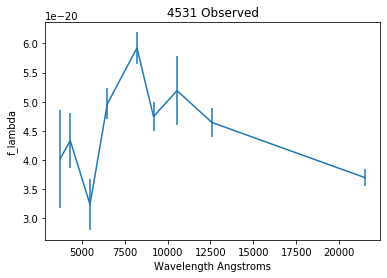

21.593652450423505


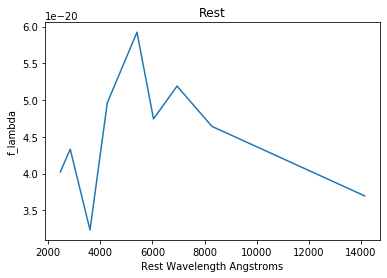

0.519


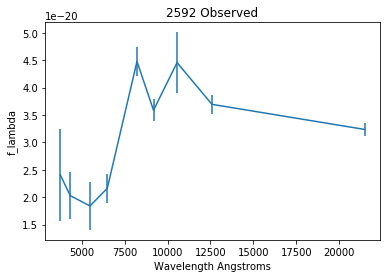

21.837660445543285


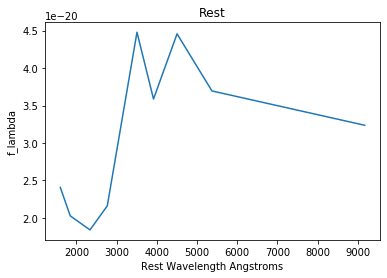

1.342


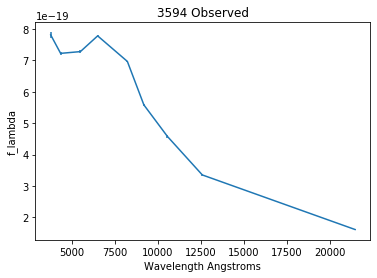

19.760847688236467


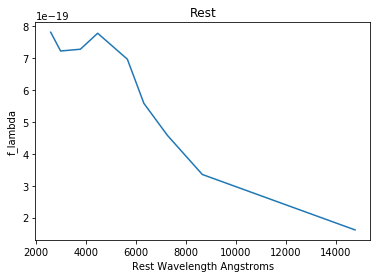

0.455


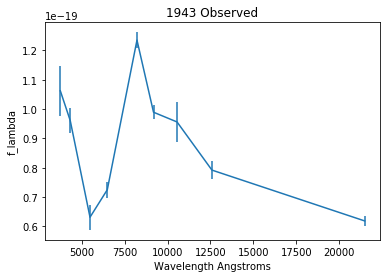

21.091119311559922


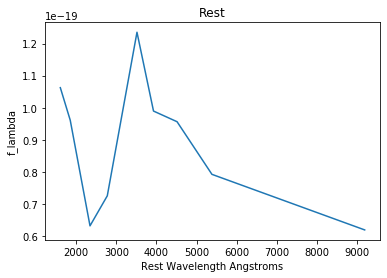

1.337


/home/jacob/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log10
  """


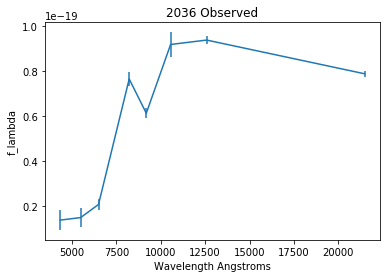

20.843506745294963


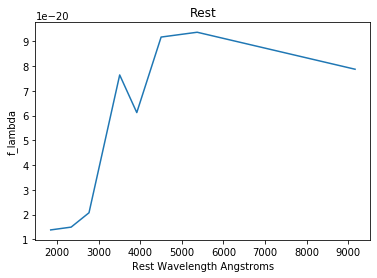

1.344


In [35]:
#for loop to find magnitude of each flux value for the galaxies along with their error
for galaxy in range(5):
    galy = [fluxu[galaxy],fluxb[galaxy], fluxv[galaxy], fluxr[galaxy], fluxi[galaxy], fluxz[galaxy], fluxy[galaxy], fluxj[galaxy], fluxk[galaxy]]
    #galy = [fluxu[galaxy],fluxb[galaxy], fluxv[galaxy], fluxr[galaxy], fluxi[galaxy], fluxz[galaxy], fluxy[galaxy], fluxj[galaxy], fluxk[galaxy], fluxi1[galaxy],fluxi2[galaxy]]
    magu = -2.5 * np.log10(fluxu[galaxy]) + 25
    magv = -2.5 * np.log10(fluxv[galaxy]) + 25
    magb = -2.5 * np.log10(fluxb[galaxy]) + 25
    magr = -2.5 * np.log10(fluxr[galaxy]) + 25
    magi = -2.5 * np.log10(fluxz[galaxy]) + 25
    magz = -2.5 * np.log10(fluxz[galaxy]) + 25
    magy = -2.5 * np.log10(fluxy[galaxy]) + 25
    magj = -2.5 * np.log10(fluxj[galaxy]) + 25
    magk = -2.5 * np.log10(fluxk[galaxy]) + 25
    #magi1 = -2.5 * np.log10(fluxi1[galaxy]) + 25
    #magi2 = -2.5 * np.log10(fluxi2[galaxy]) + 25
   
    mageu = -2.5 * np.log10(erru[galaxy]) + 25
    magev = -2.5 * np.log10(errv[galaxy]) + 25
    mageb = -2.5 * np.log10(errb[galaxy]) + 25
    mager = -2.5 * np.log10(errr[galaxy]) + 25
    magei = -2.5 * np.log10(erri[galaxy]) + 25
    magez = -2.5 * np.log10(errz[galaxy]) + 25
    magey = -2.5 * np.log10(erry[galaxy]) + 25
    magej = -2.5 * np.log10(errj[galaxy]) + 25
    magek = -2.5 * np.log10(errk[galaxy]) + 25
    #converting the magnitude to f_nu along with error
    fnuu = (10 ** ((magu + 48.6) / -2.5)) * mag25
    fnub = (10 ** ((magb + 48.6) / -2.5)) * mag25
    fnuv = (10 ** ((magv + 48.6) / -2.5)) * mag25
    fnur = (10 ** ((magr + 48.6) / -2.5)) * mag25
    fnui = (10 ** ((magi + 48.6) / -2.5)) * mag25
    fnuz = (10 ** ((magz + 48.6) / -2.5)) * mag25
    fnuk = (10 ** ((magk + 48.6) / -2.5)) * mag25
    fnuy = (10 ** ((magy + 48.6) / -2.5)) * mag25
    fnuj = (10 ** ((magj + 48.6) / -2.5)) * mag25
    #fnui1 = (10 ** ((magi1 + 48.6) / -2.5)) * mag25
    #fnui2 = (10 ** ((magi2 + 48.6) / -2.5)) * mag25
    
    fnueu = (10 ** ((mageu + 48.6) / -2.5)) * mag25
    fnueb = (10 ** ((mageb + 48.6) / -2.5)) * mag25
    fnuev = (10 ** ((magev + 48.6) / -2.5)) * mag25
    fnuer = (10 ** ((mager + 48.6) / -2.5)) * mag25
    fnuei = (10 ** ((magei + 48.6) / -2.5)) * mag25
    fnuez = (10 ** ((magez + 48.6) / -2.5)) * mag25
    fnuek = (10 ** ((magek + 48.6) / -2.5)) * mag25
    fnuey = (10 ** ((magey + 48.6) / -2.5)) * mag25
    fnuej = (10 ** ((magej + 48.6) / -2.5)) * mag25
    #changing f_nu values to f_lambda values for each galaxy and band along with error 
    flamu = (((3 * 10 ** 18) / ((xval[0]) ** 2)) * fnuu) * ((0.361 * 10**6) / (10**-23))
    flamb = (((3 * 10 ** 18) / ((xval[1]) ** 2)) * fnub) * ((0.361 * 10**6) / (10**-23))
    flamv = (((3 * 10 ** 18) / ((xval[2]) ** 2)) * fnuv) * ((0.361 * 10**6) / (10**-23))
    flamr = (((3 * 10 ** 18) / ((xval[3]) ** 2)) * fnur) * ((0.361 * 10**6) / (10**-23))
    flami = (((3 * 10 ** 18) / ((xval[4]) ** 2)) * fnui) * ((0.361 * 10**6) / (10**-23))
    flamz = (((3 * 10 ** 18) / ((xval[5]) ** 2)) * fnuz) * ((0.361 * 10**6) / (10**-23))
    flamj = (((3 * 10 ** 18) / ((xval[7]) ** 2)) * fnuj) * ((0.361 * 10**6) / (10**-23))
    flamk = (((3 * 10 ** 18) / ((xval[8]) ** 2)) * fnuk) * ((0.361 * 10**6) / (10**-23))
    flamy = (((3 * 10 ** 18) / ((xval[6]) ** 2)) * fnuy) * ((0.361 * 10**6) / (10**-23))
    #flami1 = (((3 * 10 ** 18) / ((xval[9]) ** 2)) * fnui1) * ((0.361 * 10**6) / (10**-23))
    #flami2 = (((3 * 10 ** 18) / ((xval[10]) ** 2)) * fnui2) * ((0.361 * 10**6) / (10**-23))
    
    flameu = (((3 * 10 ** 18) / ((xval[0]) ** 2)) * fnueu) * ((0.361 * 10**6) / (10**-23))
    flameb = (((3 * 10 ** 18) / ((xval[1]) ** 2)) * fnueb) * ((0.361 * 10**6) / (10**-23))
    flamev = (((3 * 10 ** 18) / ((xval[2]) ** 2)) * fnuev) * ((0.361 * 10**6) / (10**-23))
    flamer = (((3 * 10 ** 18) / ((xval[3]) ** 2)) * fnuer) * ((0.361 * 10**6) / (10**-23))
    flamei = (((3 * 10 ** 18) / ((xval[4]) ** 2)) * fnuei) * ((0.361 * 10**6) / (10**-23))
    flamez = (((3 * 10 ** 18) / ((xval[5]) ** 2)) * fnuez) * ((0.361 * 10**6) / (10**-23))
    flamej = (((3 * 10 ** 18) / ((xval[7]) ** 2)) * fnuej) * ((0.361 * 10**6) / (10**-23))
    flamek = (((3 * 10 ** 18) / ((xval[8]) ** 2)) * fnuek) * ((0.361 * 10**6) / (10**-23))
    flamey = (((3 * 10 ** 18) / ((xval[6]) ** 2)) * fnuey) * ((0.361 * 10**6) / (10**-23))
    
    #setting the y axis for the plot and adding the error array so that error can be added to the plot
    gallamy = [flamu, flamb, flamv, flamr, flami, flamz, flamy, flamj, flamk]
    error = [flameu, flameb, flamev, flamer, flamei, flamez, flamey, flamej, flamek]
    #builds a plot for the observed flux in terms of lambda and the wavelength of each band
    plt.errorbar(xval, gallamy, yerr = error)
    plt.xlabel('Wavelength Angstroms')
    plt.ylabel('f_lambda')
    titlestr = str(galindex[galaxy]) + ' Observed'
    #plt.title('Galaxy One: ', galindex[galaxy])
    #plt.title('Observed')
    plt.title(titlestr)
    #You are using galindex as an index, when it is really an ID.  In the specific case of *this* catalog
    #this kind of works (if you subtract -1) because the IDs are sequential starting at 1.  But for a 
    #generic catalog this won't work.
    #for the love of god, don't ever call non-index variables "index":-)
    magstr = 'Kmag = ' + "{:0.2f}".format(goodmag[galindex[galaxy] - 1])
    #plt.text(10000, 8, goodmag[galindex[galaxy]])
    #plt.text(15000, 1.1e-19, magstr)
    plt.show()
    print(goodmag[galindex[galaxy]-1])
    #determines the redshift for each galaxy as taken from the z-spec catalog and assigns the galaxy ID with
    #the proper redshift value
    z = zdat['spec_z'][galindex[galaxy]-1]
    #changes the observed wavelength the flux was taken at and converts it to the rest wavelength based on
    #the redshift of the galaxy
    rest = xval / (1+z)
    #print("z is equal to: ", z,"rest: ", rest)
    xprime.append(rest) #lambda_rest = lambda_obs / (1+z)
    #print(xprime)
    #plots the flux in terms of lambda at the rest wavelength for each band for each galaxy
    plt.plot(xprime[galaxy], gallamy, '-')
    #fig = plt.plot(plt.plot(xprime[galaxy], gallamy, '-'))
    #ax = fig.add_axes([0,0,1,1])
    plt.xlabel('Rest Wavelength Angstroms')
    plt.ylabel('f_lambda')
    plt.title('Rest')
    plt.show()
    print(z)

In [36]:
#assigns a cluster name array along with the K band filter name that was used for each catalog
clustname = ["SpARCS-0035", "SpARCS-0219", "SpARCS-0335", "SpARCS-1034", "SpARCS-1051", "SpARCS-1616",\
             "SpARCS-1634", "SpARCS-1638", "SPTCL-0205", "SPTCL-0546", "SPTCL-2106"]
#names: 0035, 0219, 0335, 1034, 1051,1616, 1634, 1638, 0205, 0546, 2106
extname = ["HAWKIKs","FOURSTARKs","HAWKIKs", "WIRCamK", "WIRCamK", "WIRCamK", "WIRCamK",\
           "WIRCamK", "FOURSTARKs", "FOURSTARKs", "HAWKIKs"]

#initialize dictionary
photdat = {}
zdat = {}
goodindx = {}
goodgal = {}

#path of the files
catpath = "/home/jacob/PHOTOMETRY/PHOTOM_CATS/"
#catpath = "/Users/grudnick/Work/GOGREEN/Data/Releases/v1.1/PHOTOMETRY/PHOTOM_CATS/"
zpath = "/home/jacob/PHOTOMETRY/SPECZ_MATCHED/"
#zpath = "/Users/grudnick/Work/GOGREEN/Data/Releases/v1.1/PHOTOMETRY/SPECZ_MATCHED/"

respath = "/home/jacob/PHOTOMETRY/BESTFIT_SEDs+EAZY/for_greg/"

In [37]:
#loop through all the cluster names, using an index so that you can also access
#the appropriate element of extname
for iclust in range(len(clustname)):
    filepath = catpath + clustname[iclust] + "_totalall_" + extname[iclust] + ".cat"
    photdat[clustname[iclust]] = ascii.read(filepath)
    
    filepath = zpath + "compilation_" + clustname[iclust] + ".dat"
    zdat[clustname[iclust]] = ascii.read(filepath)
    
    goodindx[clustname[iclust]] = np.where((photdat[clustname[iclust]]['totmask'] == 0) & \
                                           (photdat[clustname[iclust]]['K_flag'] == 0) &\
                    ((zdat[clustname[iclust]]['quality'] == 3) | (zdat[clustname[iclust]]['quality'] == 4)))
    goodindx[clustname[iclust]] = goodindx[clustname[iclust]][0]
    
    for igood in range(len(goodindx[clustname[iclust]])):
        #makes a string which contains the ID # of every galaxy that passed the above where command
        idstring = str(photdat[clustname[iclust]]['id'][goodindx[clustname[iclust]][igood]])
        #print(idstring)
        #read in the residual file for that galaxy
        resfilepath = respath + clustname[iclust] + "_totalall_Ks_" + idstring + ".obs_sed"
        residfiledat = ascii.read(resfilepath)
        #put a loop here that goes line by line through residfiledat, finds which filter
        #each line corresponds to (which you call filt), and assigns the appropriate columns
        #to an additional set of keys
        #for lines in residfiledat:
            #parse those lines using the split() command
            #cols = line.split()
            #determine which filter each line is and call that filt
            #for sparcs 0035 the filter list goes as thus: hawkiks, Vimosu,b,v,r,i,decamz, Fourstarj1, HawkiJ
            #IRAC1, IRAC2. This is 11 filters/rows to worry about. But the row # for each of these filters
            #changes depending on the catalog. I feel like I need to do a nested for loop to loop through all
            #the catalogs to assign filters to each catalog for the dictionary so when I run through this loop
            #I can just say [filt][vimosu] for instance into the goodgal dictionary and that will take me to 
            #the right row.
            #VIMOSU = 3.7e+03
            #MegaCamu = 3.8e+03
            #VIMOSB = 4.3e+03
            #Suprimeg = 4.7e+03
            #VIMOSV = 5.4e+03
            #Suprimer = 6.2e+03
            #VIMOSR = 6.4e+03
            #Suprimei = 7.6e+03
            #VIMOSI = 8.2e+03
            #HSCz = 8.9e+03
            #VIMOSz = 9.0e+03
            #DECamz = 9.1e+03
            #GMOSz = 9.1e+03
            #HSCy = 9.7e+03
            #Suprimey = 9.9e+03
            #HAWKIY = 1.0e+04
            #FOURSTARJ1 = 1.0e+04
            #HAWKIJ = 1.2e+04
            #FOURSTARJ = 1.2e+04
            #WIRCamJ = 1.2e+04
            #FOURSTARKs = 2.1e+04
            #HAWKIKs = 2.1e+04
            #WIRCamK = 2.1e+04
            #IRAC1 = 3.5e+04
            #IRAC2 = 4.5e+04
            #filt = [VIMOSU, MegaCamu, VIMOSB, Suprimeg, VIMOSV, Suprimer, VIMOSR, Suprimei, VIMOSI, HSCz, \
                   #VIMOSz, DECamz, GMOSz, HSCy, Suprimey, HAWKIY, FOURSTARJ1, HAWKIJ, FOURSTARJ, WIRCamJ, \
                   #FOURSTARKs, HAWKIKs, WIRCamK, IRAC1, IRAC2]
            #this is a dictionary whose first key is the name of the cluster
            #second key is a string containing the id
            #third key is the band
            #4th-?? keys are the fdat, fmod, etc.
            #goodgal[clustname[iclust]][idstring][filt]['fmod'] = cols[2]
            #goodgal[clustname[iclust]][idstring][filt]['fdat'] = cols[6]
            #goodgal[clustname[iclust]][goodindx[clustname[iclust]]][zdat['z_spec']]
            
            #don't forget to include the redshift in this dictionary



In [38]:
#test to make sure the above code is working
print(goodindx['SpARCS-0035'])
print(residfiledat)

[ 480 1193 1197 1200 1202 1237 1295 1332 1341 1363 1404 1438 1449 1451
 1476 1499 1523 1559 1561 1568 1572 1588 1618 1625 1638 1657 1698 1700
 1701 1719 1739 1790 1825 1843 1845 1852 1883 1898 1900 1908 1917 1922
 1942 1952 1965 1995 2002 2009 2028 2029 2031 2035 2039 2050 2068 2069
 2089 2105 2120 2125 2127 2181 2185 2192 2199 2201 2210 2226 2229 2235
 2242 2246 2306 2314 2319 2323 2338 2344 2378 2380 2393 2405 2420 2439
 2440 2461 2515 2520 2524 2549 2552 2557 2582 2616 2621 2633 2662 2672
 2673 2691 2723 2729 2732 2739 2742 2753 2767 2770 2785 2820 2832 2849
 2859 2908 2911 2913 2914 2929 2935 2952 2961 2988 3003 3021 3022 3050
 3064 3115 3137 3152 3204 3262 3266 3270 3379 3407 3421 3430 3435 3481
 3485 3494 3545 3547 3548 3593 3611 3614 3638 3641 3688 3691 3706 3746
 3754 3765 3801 3808 3821 3850 3882 3902 3915 3974 4002 4007 4017 4048
 4243 4256 4257 4301 4351 4430 4435 4444 4446 4449 4468 4542 4553 4590
 4597 4635 4659 4677 4689 4709 4793 4811 4824 4859 4884]
 lambda  flux_cat er

Next steps: 
*assign each band a wavelength that goes out to the single digits place for easier computation.
*With each bands wavelength specified, I can start building dictionaries for each band to build a plot
*Build plots for each band 